In [3]:
import numpy as np
import os, sys
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from skimage.feature import local_binary_pattern

c:\Users\HP\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


### PRIMERO ENTRENAMOS EL MODELO CON LAS CARACTERISTICAS HOG

In [9]:
x_train_hog = np.load(os.getcwd() + "/x_train_hog.npy")
print(x_train_hog)
y_train_hog = np.load(os.getcwd() + "/y_train_hog.npy")
print(y_train_hog)

[[0.06741238 0.06666996 0.05018073 ... 0.00053681 0.00625812 0.00537487]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.06130948 0.01892311 0.05881432]
 ...
 [0.01512267 0.         0.         ... 0.         0.         0.00671988]
 [0.12196142 0.18785213 0.08513505 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[1 1 1 ... 0 0 0]


In [10]:
print("tamaño de las x de entrenamiento:")
print(x_train_hog.shape)
print("tamaño de las y de entrenamiento:")
print(y_train_hog.shape)

tamaño de las x de entrenamiento:
(3114, 8100)
tamaño de las y de entrenamiento:
(3114,)


In [11]:
clasifier_hog = svm.SVC(kernel="linear") # kernel lineal

clasifier_hog.fit(x_train_hog, y_train_hog) # entranamos el modelo

SVC(kernel='linear')

In [12]:
x_test_hog = np.load(os.getcwd() + "/x_test_hog.npy")
print(x_test_hog)
y_test_hog = np.load(os.getcwd() + "/y_test_hog.npy")
print(y_test_hog)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.04642025 0.00307377 0.         ... 0.         0.0072719  0.15840915]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[1 1 1 ... 0 0 0]


In [13]:
y_pred_hog = clasifier_hog.predict(x_test_hog)

In [14]:
y_pred_hog

array([1, 1, 1, ..., 0, 0, 0])

In [15]:
#Proporción de predicciones correctas (tanto positivas como negativas) sobre el total de casos
#Qué tan bueno es el modelo en general para clasificar bien.
print("Accuracy:",metrics.accuracy_score(y_test_hog, y_pred_hog))

#De todas las veces que el modelo dijo "tumor", cuántas veces acertó realmente.
#Qué tan confiables son las predicciones positivas del modelo.
#Alta precisión significa pocos falsos positivos.
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_hog, y_pred_hog))

#De todos los casos reales de tumor, cuántos detectó el modelo.
#Qué tan bueno es el modelo para detectar todos los casos positivos.
#Alto recall significa pocos falsos negativos
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_hog, y_pred_hog))

Accuracy: 0.971830985915493
Precision: 0.9687924016282226
Recall: 0.9794238683127572


In [9]:
# guardamos el modelo para usarlo
import joblib
from pathlib import Path

path_model = Path.cwd() # nos paramos en la direccion actual, ya que aqui deseo guardar el modelo

joblib.dump(clasifier_hog, path_model / "svm_brain_model_hog.joblib") # guardamos el modelo en la direccion indicada con el nombre
                                                              # "svm_brain_model_hog.joblib"
print("El modelo se ha guardado en", path_model / "svm_brain_model_hog.joblib")


El modelo se ha guardado en c:\Users\HP\Desktop\proc_dig_ima\Lab_02\Model\svm_brain_model_hog.joblib


### LUEGO ENTRENAMOS EL MODELO CON LAS CARACTERISTICAS LBP

In [19]:
x_train_lbp = np.load(os.getcwd() + "/x_train_lbp.npy")
print(x_train_lbp)
y_train_lbp = np.load(os.getcwd() + "/y_train_lbp.npy")
print(y_train_lbp)

[[ 2317  6188  4117 ...     0     0     0]
 [ 5218 13306 11730 ...     0     0     0]
 [ 2805  6215  5423 ...     0     0     0]
 ...
 [ 1594  2462  1406 ...     0     0     0]
 [  903  1902  1271 ...     0     0     0]
 [ 1072  1740  1067 ...     0     0     0]]
[1 1 1 ... 0 0 0]


In [20]:
print("tamaño de las x de entrenamiento:")
print(x_train_lbp.shape)
print("tamaño de las y de entrenamiento:")
print(y_train_lbp.shape)

tamaño de las x de entrenamiento:
(1349, 59)
tamaño de las y de entrenamiento:
(1349,)


In [21]:
x_test_lbp = np.load(os.getcwd() + "/x_test_lbp.npy")
print(x_test_lbp)
y_test_lbp = np.load(os.getcwd() + "/y_test_lbp.npy")
print(y_test_lbp)

[[ 2317  6188  4117 ...     0     0     0]
 [ 5218 13306 11730 ...     0     0     0]
 [ 2805  6215  5423 ...     0     0     0]
 ...
 [ 1594  2462  1406 ...     0     0     0]
 [  903  1902  1271 ...     0     0     0]
 [ 1072  1740  1067 ...     0     0     0]]
[1 1 1 ... 0 0 0]


In [23]:
clasifier_lbp = svm.SVC(kernel="linear") # kernel lineal
clasifier_lbp.fit(x_train_lbp, y_train_lbp) # entranamos el modelo

SVC(kernel='linear')

In [24]:
y_pred_lbp = clasifier_lbp.predict(x_test_lbp)
print(y_pred_lbp)

[1 1 1 ... 0 0 0]


In [ ]:
#Proporción de predicciones correctas (tanto positivas como negativas) sobre el total de casos
#Qué tan bueno es el modelo en general para clasificar bien.
print("Accuracy:",metrics.accuracy_score(y_test_lbp, y_pred_lbp))

#De todas las veces que el modelo dijo "tumor", cuántas veces acertó realmente.
#Qué tan confiables son las predicciones positivas del modelo.
#Alta precisión significa pocos falsos positivos.
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_lbp, y_pred_lbp))

#De todos los casos reales de tumor, cuántos detectó el modelo.
#Qué tan bueno es el modelo para detectar todos los casos positivos.
#Alto recall significa pocos falsos negativos
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_lbp, y_pred_lbp))

Accuracy: 0.7160859896219421
Precision: 0.7240932642487047
Recall: 0.766803840877915


In [32]:
# guardamos el modelo para usarlo
import joblib
from pathlib import Path

path_model = Path.cwd() # nos paramos en la direccion actual, ya que aqui deseo guardar el modelo

joblib.dump(clasifier_lbp, path_model / "svm_brain_model_lbp.joblib") # guardamos el modelo en la direccion indicada con el nombre
                                                              # "svm_brain_model_lbp.joblib"
print("El modelo se ha guardado en", path_model / "svm_brain_model_lbp.joblib")


El modelo se ha guardado en c:\Users\HP\Desktop\proc_dig_ima\Lab_02\Model\svm_brain_model_lbp.joblib


Matriz de confusion (array):
[[597  23]
 [ 15 714]]


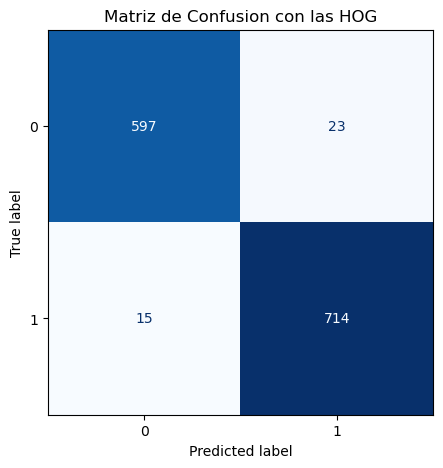

In [26]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# calcula la matriz de confusion
cm = confusion_matrix(y_test_hog, y_pred_hog)

# muestra la matriz
print("Matriz de confusion (array):")
print(cm)

#
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clasifier_hog.classes_)
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(cmap="Blues", ax=ax, colorbar=False)
plt.title("Matriz de Confusion con las HOG")
plt.show()


Matriz de confusion (array):
[[407 213]
 [170 559]]


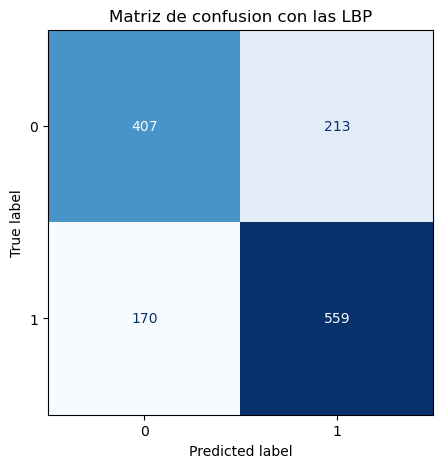

In [27]:
# calcula la matriz de confusion
cm = confusion_matrix(y_test_lbp, y_pred_lbp)

# muestra la matriz
print("Matriz de confusion (array):")
print(cm)

#
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clasifier_lbp.classes_)
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(cmap="Blues", ax=ax, colorbar=False)
plt.title("Matriz de confusion con las LBP")
plt.show()
